

# Machine Learning Midterm Project: Banknote Authentication Analysis
**Author:** AARON 
**Date:** November 10, 2025 
**Objective:** Setup two model types, Neural Network and Decision Tree, and use these to predict authenticity of bank notes from the UCI Banknote Authentication Dataset.



## Introduction
- 1st, This project uses the UCI Banknote Authentication Dataset to Explore and Clean data, choose features used to predict authenticity of bank notes, and split the dataset into train and test subsets.
- 2nd, Two model types, Neural Network and Decision Tree, will be used to predict authenticity of bank notes from the UCI Banknote Authentication Dataset.
- 3rd, Reflections are include from the sections of the notebook.  These reflections are summaries of why choices were made and key points from the data analysis. 


## Section 1. Import and Inspect the Data
 

### 1.1 Include Imports

In [417]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import scatter_matrix
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from matplotlib.colors import ListedColormap


### 1.2 Load the dataset and display basic information

In [418]:


# Load UCI Banknote Authentication Dataset

file_path = r"C:\Repos\applied-ml-hrawp\data\data_banknote_authentication.txt"

real_money = pd.read_csv(file_path, header=None)
real_money.columns = ['variance', 'skewness', 'curtosis', 'entropy', 'class']

# Display a few records to verify
real_money.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


### 1.3 Check for missing values and display summary statistics

In [419]:
# Check for missing values using the isnull() method and then the sum() method. 
real_money.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [420]:
# Display summary statistics using the describe() method

print(real_money.describe())

          variance     skewness     curtosis      entropy        class
count  1372.000000  1372.000000  1372.000000  1372.000000  1372.000000
mean      0.433735     1.922353     1.397627    -1.191657     0.444606
std       2.842763     5.869047     4.310030     2.101013     0.497103
min      -7.042100   -13.773100    -5.286100    -8.548200     0.000000
25%      -1.773000    -1.708200    -1.574975    -2.413450     0.000000
50%       0.496180     2.319650     0.616630    -0.586650     0.000000
75%       2.821475     6.814625     3.179250     0.394810     1.000000
max       6.824800    12.951600    17.927400     2.449500     1.000000


In [421]:
# Check for correlations using the corr() method and tell it to use only the numeric features. 

print(real_money.corr(numeric_only=True))

          variance  skewness  curtosis   entropy     class
variance  1.000000  0.264026 -0.380850  0.276817 -0.724843
skewness  0.264026  1.000000 -0.786895 -0.526321 -0.444688
curtosis -0.380850 -0.786895  1.000000  0.318841  0.155883
entropy   0.276817 -0.526321  0.318841  1.000000 -0.023424
class    -0.724843 -0.444688  0.155883 -0.023424  1.000000


### Reflection 1:
- How many data instances are there? 1372
- How many features are there? 4
- What are the names?  Variance;     Skewness;     Curtosis;      Entropy;            
- Are there any missing values? No
- Are there any non-numeric features? Yes.  All four features are numeric.
- Are the data instances sorted on any of the attributes?  There is no a sort on any attribute.
- What two different features have the highest correlation? Skewness and Entropy against Variance
- Are there any categorical features that might be useful for prediction?  Perhaps entropy and curtosis would be a good place to start.

## Section 2. Data Exploration and Preparation
### 2.1 Explore Data Patterns and Distributions

array([[<Axes: xlabel='variance', ylabel='variance'>,
        <Axes: xlabel='skewness', ylabel='variance'>,
        <Axes: xlabel='curtosis', ylabel='variance'>,
        <Axes: xlabel='entropy', ylabel='variance'>,
        <Axes: xlabel='class', ylabel='variance'>],
       [<Axes: xlabel='variance', ylabel='skewness'>,
        <Axes: xlabel='skewness', ylabel='skewness'>,
        <Axes: xlabel='curtosis', ylabel='skewness'>,
        <Axes: xlabel='entropy', ylabel='skewness'>,
        <Axes: xlabel='class', ylabel='skewness'>],
       [<Axes: xlabel='variance', ylabel='curtosis'>,
        <Axes: xlabel='skewness', ylabel='curtosis'>,
        <Axes: xlabel='curtosis', ylabel='curtosis'>,
        <Axes: xlabel='entropy', ylabel='curtosis'>,
        <Axes: xlabel='class', ylabel='curtosis'>],
       [<Axes: xlabel='variance', ylabel='entropy'>,
        <Axes: xlabel='skewness', ylabel='entropy'>,
        <Axes: xlabel='curtosis', ylabel='entropy'>,
        <Axes: xlabel='entropy', ylabel=

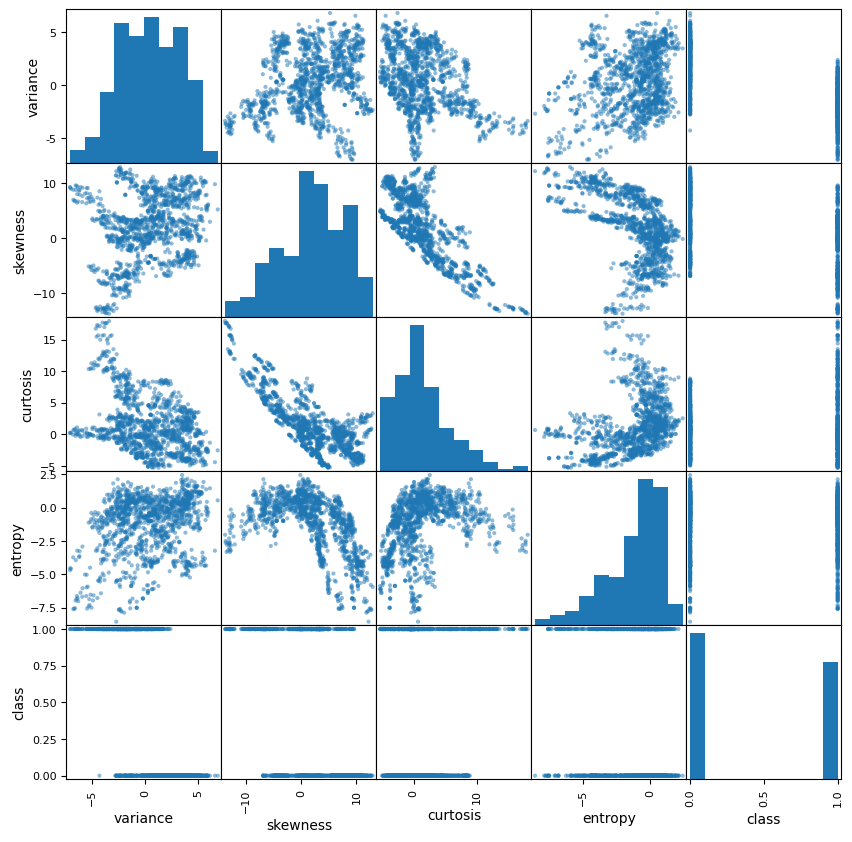

In [422]:
# Create a scatter matrix of 'variance', 'skewness', 'curtosis', 'entropy', 'class':

scatter_matrix(real_money[real_money.columns], figsize=(10, 10))

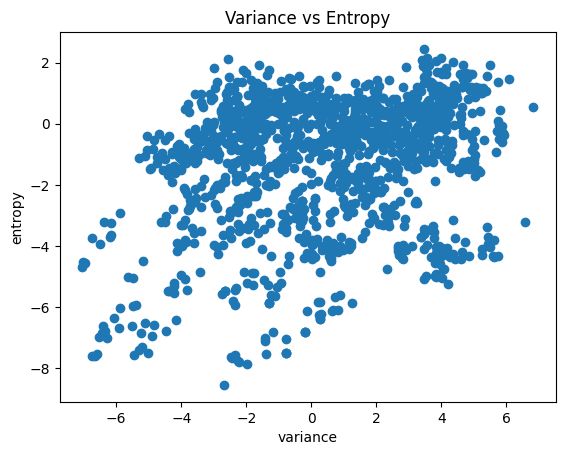

In [423]:
# Create a scatter plot of variance vs entropy:

plt.scatter(real_money['variance'], real_money['entropy'])
plt.xlabel('variance')
plt.ylabel('entropy')
plt.title('Variance vs Entropy')
plt.show()

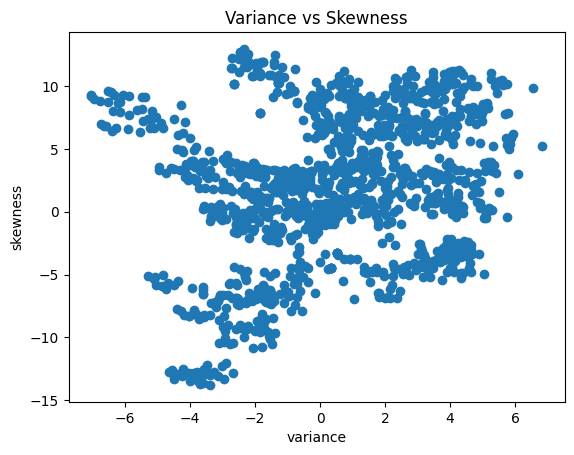

In [424]:
# Create a scatter plot of variance vs skewness:

plt.scatter(real_money['variance'], real_money['skewness'])
plt.xlabel('variance')
plt.ylabel('skewness')
plt.title('Variance vs Skewness')
plt.show()

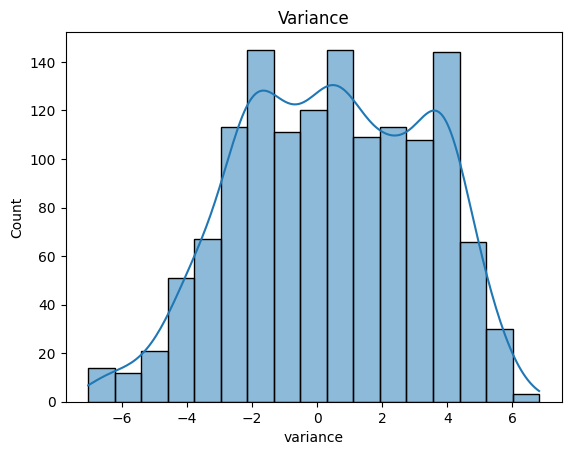

In [425]:
# Create a histogram of variance:

sns.histplot(real_money['variance'], kde=True)
plt.title('Variance')
plt.show()

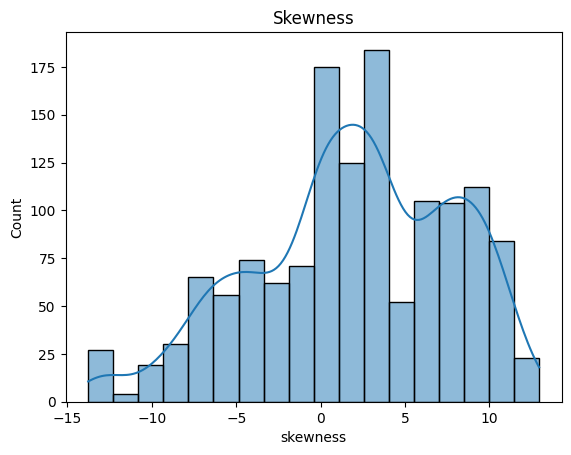

In [426]:
# Create a histogram of skewness:

sns.histplot(real_money['skewness'], kde=True)
plt.title('Skewness')
plt.show()

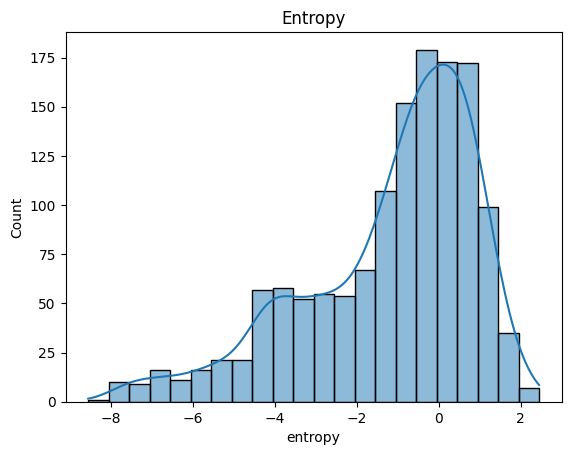

In [427]:
# Create a histogram of entropy:

sns.histplot(real_money['entropy'], kde=True)
plt.title('Entropy')
plt.show()

### 2.2 Feature Engineering

In [428]:
# Create a new feature: Skewness and Variance
real_money['skew_var'] = real_money['skewness'] + real_money['variance']


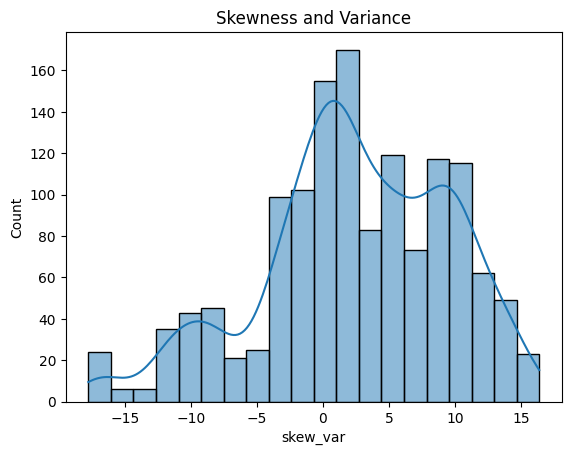

In [429]:
# Create a histogram of skew_var:

sns.histplot(real_money['skew_var'], kde=True)
plt.title('Skewness and Variance')
plt.show()

## Section 3. Feature Selection and Justification
### 3.1 Choose features and target



Case 1: 
input features: 'Curtosis' and 'Variance'
target: class

Case 2:
input features - 'Skewness' and 'Variance'
target: class

Case 3:
input features -  'Curtosis' and 'Skewness and Variance'
target: class


### 3.2 Define X and y

Assign input features to X a pandas DataFrame with 1 or more input features
Assign target variable to y (as applicable) - a pandas Series with a single target feature

In [430]:
# Case 1: Features = Curtosis, Variance
# Select the features 'curtosis', 'variance' as input
X1 = real_money[['curtosis', 'variance']]
# Select 'survived' as the target for the same rows
y1 = real_money['class']
 

# Case 2: Features = Skewness, Variance
# Select the features 'skewness', 'variance', but drop rows where they are missing
X2 = real_money[['skewness', 'variance']].dropna()
# Select the matching 'survived' values using the same index
y2 = real_money.loc[X2.index, 'class']
 

# Case 3: Features = Curtosis, 'skew_var' (Skewness and Variance combined)
# Select both curtosis', 'skew_var', and drop rows where missing (na)
X3 = real_money[['curtosis', 'skew_var']].dropna()
# Select the corresponding 'survived' values for those rows
y3 = real_money.loc[X3.index, 'class']

### Reflection 2 and 3:
- Why are these features selected?  Curtosis, Variance, and Skewness were selected based on reviewing the overview of the data in the scatter matrix.  I saw that when skewness and variance are high in value there is a tendency for genuine notes.  I also saw when there is a lower curtosis value the tendency it towards genuine notes.  So I want to focus on these.  
- I chose for case 3 a feature engineered variable where I add the values of skewness and variance to heighten the positive values weight of the parameters.  I think that will help the model out even more.

## Section 4. Train a Classification Model (Decision Tree)
 

Split the data into training and test sets.

### 4.1 Split the Data

In [431]:
# Case 1: Features = Curtosis, Variance
splitter1 = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)
for train_idx1, test_idx1 in splitter1.split(X1, y1):

    X1_train = X1.iloc[train_idx1]
    X1_test  = X1.iloc[test_idx1]
    y1_train = y1.iloc[train_idx1]
    y1_test  = y1.iloc[test_idx1]

print('Case 1 - Curtosis + Variance:')
print('Train size:', len(X1_train), '| Test size:', len(X1_test))


Case 1 - Curtosis + Variance:
Train size: 1097 | Test size: 275


In [432]:
# Case 2: Features = Skewness, Variance
splitter2 = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)
for train_idx2, test_idx2 in splitter2.split(X2, y2):
    X2_train = X2.iloc[train_idx2]
    X2_test  = X2.iloc[test_idx2]
    y2_train = y2.iloc[train_idx2]
    y2_test  = y2.iloc[test_idx2]

print('Case 2 - Skewness + Variance:')
print('Train size:', len(X2_train), '| Test size:', len(X2_test))

Case 2 - Skewness + Variance:
Train size: 1097 | Test size: 275


In [433]:
# Case 3: Features = Curtosis, 'skew_var' (Skewness and Variance combined)
splitter3 = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)
for train_idx3, test_idx3 in splitter3.split(X3, y3):
    X3_train = X3.iloc[train_idx3]
    X3_test  = X3.iloc[test_idx3]
    y3_train = y3.iloc[train_idx3]
    y3_test  = y3.iloc[test_idx3]

print('Case 3 - Curtosis + skew_var:')
print('Train size:', len(X3_train), '| Test size:', len(X3_test))

Case 3 - Curtosis + skew_var:
Train size: 1097 | Test size: 275


### 4.2 Create and Train Model (Decision Tree)
Create and train all 3 cases.

In [434]:
# CASE 1: Decision Tree using Curtosis, Variance
tree_model1 = DecisionTreeClassifier()
tree_model1.fit(X1_train, y1_train)


,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [435]:
# CASE 2: Decision Tree using Skewness, Variance
tree_model2 = DecisionTreeClassifier()
tree_model2.fit(X2_train, y2_train)


,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [436]:
# CASE 3: Decision Tree using Curtosis, 'skew_var'
tree_model3 = DecisionTreeClassifier()
tree_model3.fit(X3_train, y3_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


### 4.3 Predict and Evaluate Model Performance

In [437]:
# Predict on training data
y1_pred = tree_model1.predict(X1_train)
print("Results for Decision Tree on training data (Case 1 - Curtosis, Variance):")
print(classification_report(y1_train, y1_pred, digits=4))

# Predict on test data
y1_test_pred = tree_model1.predict(X1_test)
print("Results for Decision Tree on test data (Case 1 - Curtosis, Variance):")
print(classification_report(y1_test, y1_test_pred, digits=4))



Results for Decision Tree on training data (Case 1 - Curtosis, Variance):
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       609
           1     1.0000    1.0000    1.0000       488

    accuracy                         1.0000      1097
   macro avg     1.0000    1.0000    1.0000      1097
weighted avg     1.0000    1.0000    1.0000      1097

Results for Decision Tree on test data (Case 1 - Curtosis, Variance):
              precision    recall  f1-score   support

           0     0.8944    0.9412    0.9172       153
           1     0.9211    0.8607    0.8898       122

    accuracy                         0.9055       275
   macro avg     0.9077    0.9009    0.9035       275
weighted avg     0.9062    0.9055    0.9051       275



In [438]:
# Predict on training data
y2_pred = tree_model2.predict(X2_train)
print("Results for Decision Tree on training data (Case 2 - Skewness, Variance):")
print(classification_report(y2_train, y2_pred, digits=4))

# Predict on test data
y2_test_pred = tree_model2.predict(X2_test)
print("Results for Decision Tree on test data (Case 2 - Skewness, Variance):")
print(classification_report(y2_test, y2_test_pred, digits=4))



Results for Decision Tree on training data (Case 2 - Skewness, Variance):
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       609
           1     1.0000    1.0000    1.0000       488

    accuracy                         1.0000      1097
   macro avg     1.0000    1.0000    1.0000      1097
weighted avg     1.0000    1.0000    1.0000      1097

Results for Decision Tree on test data (Case 2 - Skewness, Variance):
              precision    recall  f1-score   support

           0     0.9130    0.9608    0.9363       153
           1     0.9474    0.8852    0.9153       122

    accuracy                         0.9273       275
   macro avg     0.9302    0.9230    0.9258       275
weighted avg     0.9283    0.9273    0.9270       275



In [439]:
# Predict on training data
y3_pred = tree_model3.predict(X3_train)
print("Results for Decision Tree on training data (Case 3 - Curtosis, 'skew_var'):")
print(classification_report(y3_train, y3_pred, digits=4))

# Predict on test data
y3_test_pred = tree_model3.predict(X3_test)
print("Results for Decision Tree on test data (Case 3 - Curtosis, 'skew_var'):")
print(classification_report(y3_test, y3_test_pred, digits=4))

Results for Decision Tree on training data (Case 3 - Curtosis, 'skew_var'):
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       609
           1     1.0000    1.0000    1.0000       488

    accuracy                         1.0000      1097
   macro avg     1.0000    1.0000    1.0000      1097
weighted avg     1.0000    1.0000    1.0000      1097

Results for Decision Tree on test data (Case 3 - Curtosis, 'skew_var'):
              precision    recall  f1-score   support

           0     0.9745    1.0000    0.9871       153
           1     1.0000    0.9672    0.9833       122

    accuracy                         0.9855       275
   macro avg     0.9873    0.9836    0.9852       275
weighted avg     0.9858    0.9855    0.9854       275



### 4.4 Report Confusion Matrix (as a heatmap)

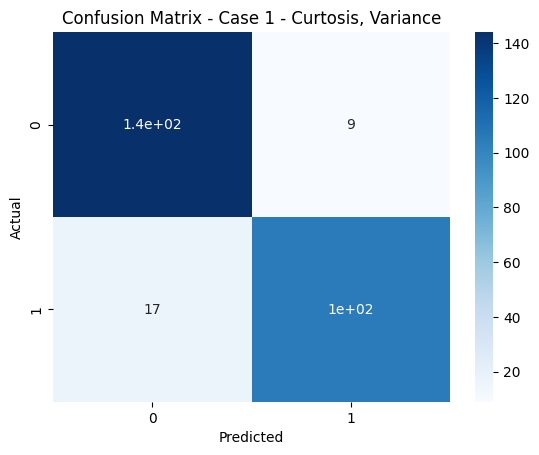

In [440]:
# Create confusion matrix for test predictions (Case 1)
cm1 = confusion_matrix(y1_test, y1_test_pred)

# Plot heatmap
sns.heatmap(cm1, annot=True, cmap='Blues')
plt.title('Confusion Matrix - Case 1 - Curtosis, Variance')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


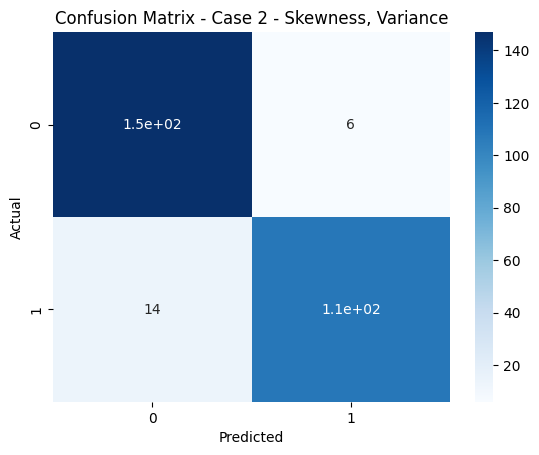

In [441]:


# Create confusion matrix for test predictions (Case 2)
cm2 = confusion_matrix(y2_test, y2_test_pred)

# Plot heatmap
sns.heatmap(cm2, annot=True, cmap='Blues')
plt.title('Confusion Matrix - Case 2 - Skewness, Variance')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


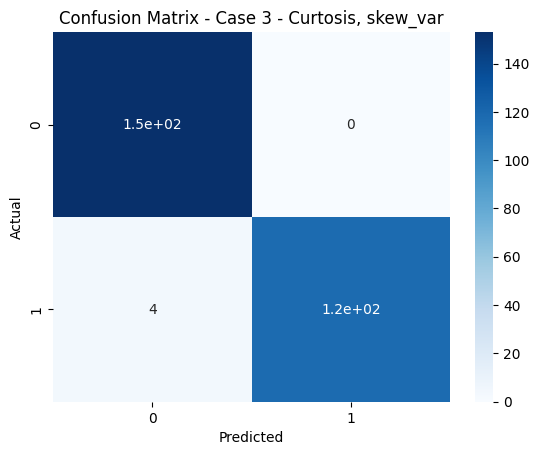

In [442]:

# Create confusion matrix for test predictions (Case 3)
cm3 = confusion_matrix(y3_test, y3_test_pred)

# Plot heatmap
sns.heatmap(cm3, annot=True, cmap='Blues')
plt.title('Confusion Matrix - Case 3 - Curtosis, skew_var')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### 4.5 Report Decision Tree Plot



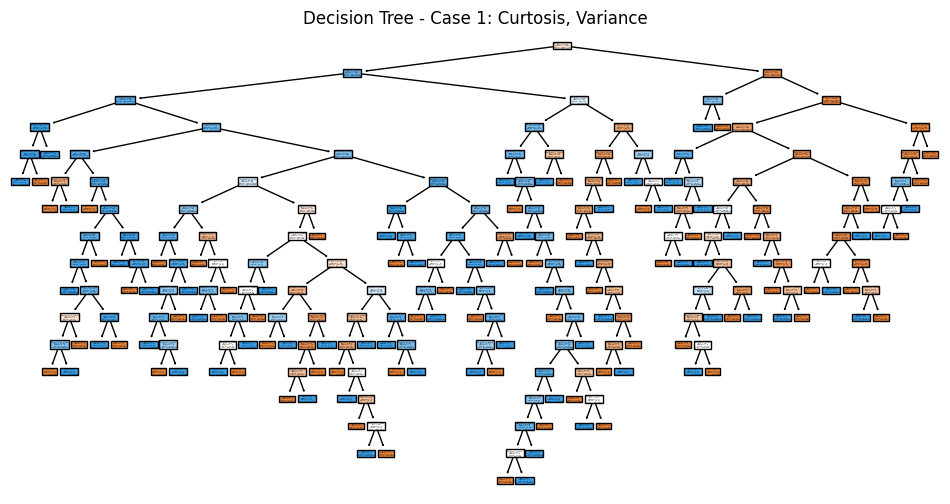

In [443]:
# Case 1

# Plot Decision Tree for Case 1
fig = plt.figure(figsize=(12, 6))
plot_tree(tree_model1,
          feature_names=X1.columns,
          class_names=['Genuine', 'Counterfeit'],
          filled=True)
plt.title("Decision Tree - Case 1: Curtosis, Variance")
plt.show()

# Save image
fig.savefig("tree_case1_midterm.png")


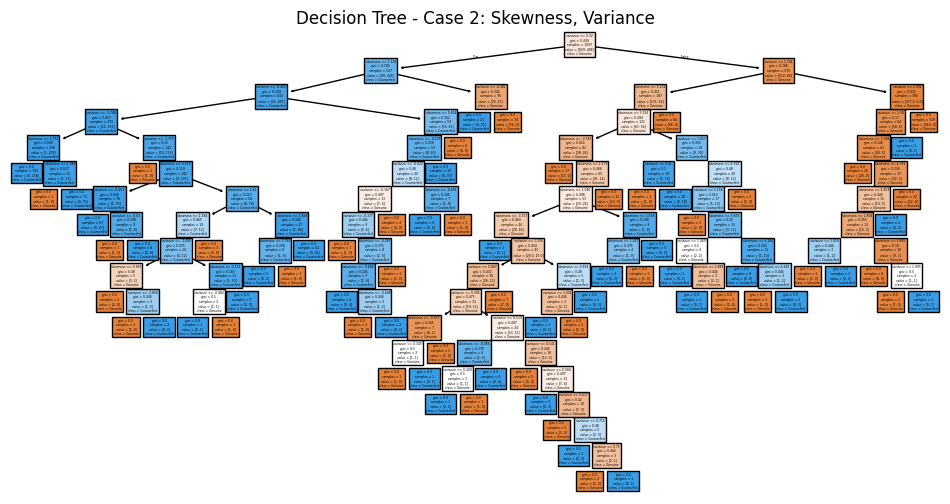

In [444]:


# Case 2

# Plot Decision Tree for Case 2
fig = plt.figure(figsize=(12, 6))
plot_tree(tree_model2,
          feature_names=X2.columns,
          class_names=['Genuine', 'Counterfeit'],
          filled=True)
plt.title("Decision Tree - Case 2: Skewness, Variance")
plt.show()

# Save image
fig.savefig("tree_case2_midterm.png")


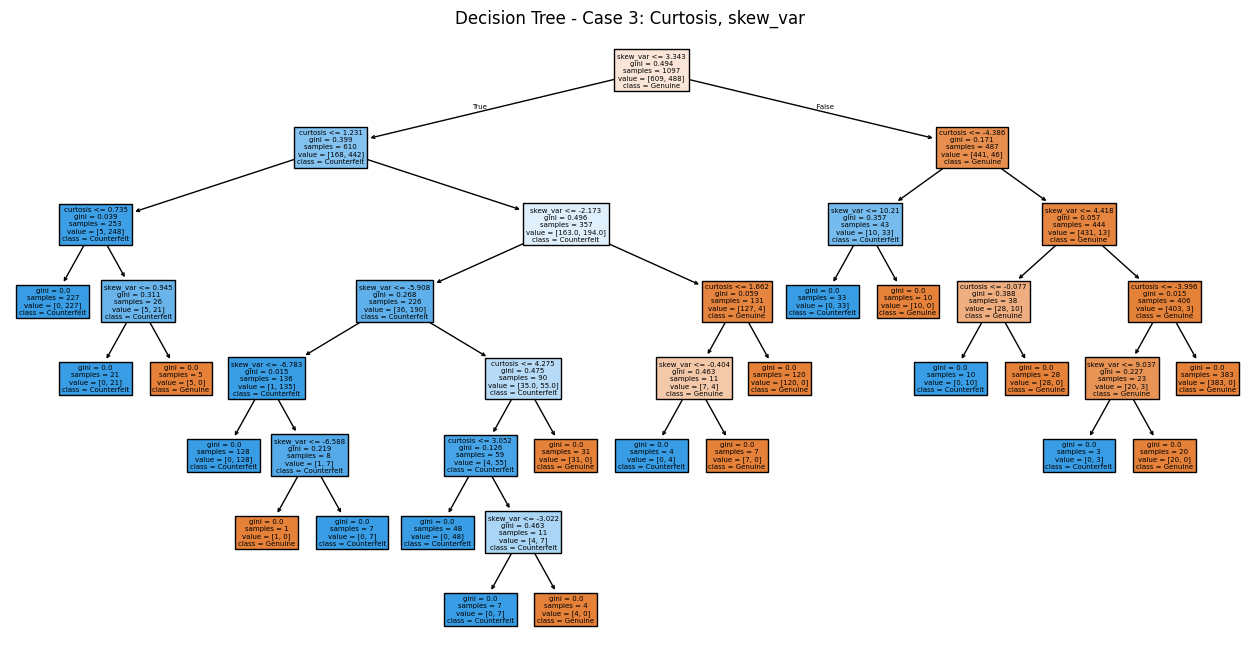

In [445]:

# Case 3

# Plot Decision Tree for Case 3
fig = plt.figure(figsize=(16, 8))
plot_tree(tree_model3,
          feature_names=X3.columns,
          class_names=['Genuine', 'Counterfeit'],
          filled=True)
plt.title("Decision Tree - Case 3: Curtosis, skew_var")
plt.show()

# Save image
fig.savefig("tree_case3_midterm.png")

Decision Tree Data

| Model Type    | Case   | Features Used     | Accuracy | Precision | Recall | F1-Score  | Notes |
|---------------|--------|-------------------|----------|-----------|--------|-----------|-------|
| Decision Tree | Case 1 | Curtosis, Variance | 91.6%   | 91.7%     | 91.6%  | 91.6%     | -     |
|               | Case 2 | Skewness, Variance | 93.1%   | 93.2%     | 93.1%  | 93.1%     | -     |
|               | Case 3 | Curtosis, skew_var | 98.6%   | 98.6%     | 98.6%  | 98.5%     | -     |



### Reflection 4:
- How well did the different cases perform?  I was happy to see all of the parameters at or above 91%.
- Are there any surprising results?  I was surprised that all the training values were 100%.  I'm not sure why that is.
I was surprised to see that the engineered feature had such a big impact.
- Which inputs worked better? I think Skewness along with Variance is a key parameter since Case 2 outperformed.  I am excited to see how these cases will turn out in a Neural Network model.

## Section 5. Compare to Nerual Network Model



### 5.1 Train and Evaluate Model (Neural Network on Case 1)

In [446]:
# Train NN for Case 1 (Curtosis, Variance)
nn_model1 = MLPClassifier(
    hidden_layer_sizes=(50, 25, 10),
    solver='lbfgs',
    max_iter=1000,
    random_state=42
)

nn_model1.fit(X1_train, y1_train)

c:\Repos\applied-ml-hrawp\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


,hidden_layer_sizes,"(50, ...)"
,activation,'relu'
,solver,'lbfgs'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,1000
,shuffle,True
,random_state,42


In [447]:
# Predict on test data (Case 1)
y1_nn_pred = nn_model1.predict(X1_test)

# Print classification report
print("Results for Neural Network on test data (Case 1 - Curtosis, Variance):")
print(classification_report(y1_test, y1_nn_pred, digits=4))

Results for Neural Network on test data (Case 1 - Curtosis, Variance):
              precision    recall  f1-score   support

           0     0.8662    0.8889    0.8774       153
           1     0.8559    0.8279    0.8417       122

    accuracy                         0.8618       275
   macro avg     0.8611    0.8584    0.8595       275
weighted avg     0.8617    0.8618    0.8616       275



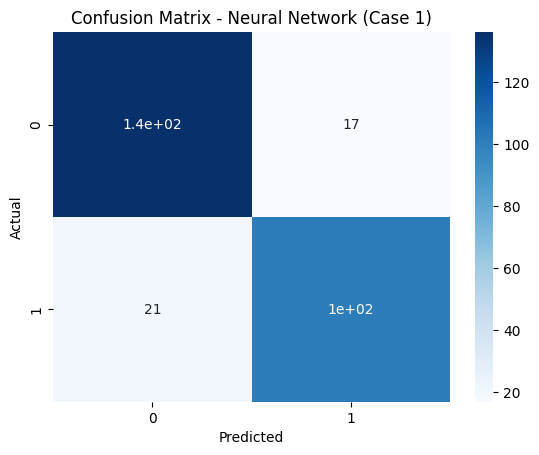

In [448]:
# Create confusion matrix
cm_nn1 = confusion_matrix(y1_test, y1_nn_pred)

# Plot heatmap
sns.heatmap(cm_nn1, annot=True, cmap='Blues')
plt.title('Confusion Matrix - Neural Network (Case 1)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### 5.2 Visualize (Neural Network on Case 1)

In [449]:
# Get the range of our two features - use padding to enhance appearance

padding = 1 
x_min, x_max = X1['curtosis'].min() - padding, X1['curtosis'].max() + padding
y_min, y_max = X1['variance'].min() - padding, X1['variance'].max() + padding

In [450]:
# Create a meshgrid (all combinations of curtosis and variance)

# A grid of values covering the entire input space
# np.linspace(start, stop, num) generates evenly spaced values (like a ruler)
# Here, we create 500 points between min and max for each axis
# np.meshgrid creates a coordinate grid from the two arrays

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                                    np.linspace(y_min, y_max, 500))

In [451]:
# Flatten the grid arrays and prepare them for prediction
# np.c_ stacks the flattened xx and yy into coordinate pairs
# .ravel() flattens a 2D array into 1D (required by the model for prediction)

Z = nn_model1.predict(np.c_[xx.ravel(), yy.ravel()])

# Reshape the predicted results to match the original 2D grid shape
Z = Z.reshape(xx.shape)

c:\Repos\applied-ml-hrawp\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


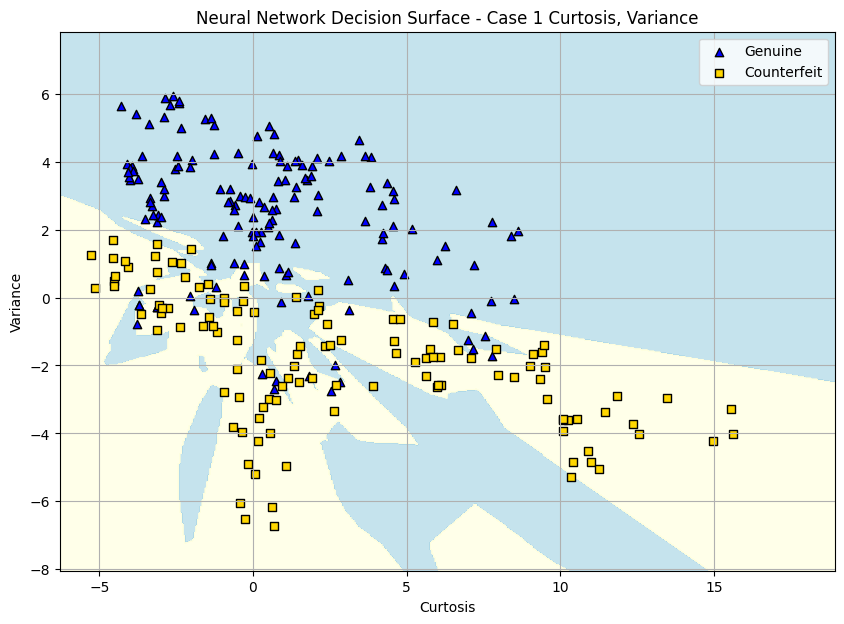

In [452]:
# Plot the decision surface (background) showing predicted survival zones

 # Blue for 0, yellow for 1 - change this up as you like
plt.figure(figsize=(10, 7))
cmap_background = ListedColormap(['lightblue', 'lightyellow'])

plt.contourf(xx, yy, Z, cmap=cmap_background, alpha=0.7)# Overlay the actual test data points for visual comparison


# Plot passengers who did NOT survive (0) as blue triangles
plt.scatter(X1_test['curtosis'][y1_test == 0],
            X1_test['variance'][y1_test == 0],
            c='blue', marker='^', edgecolor='k', label='Genuine')
 
# Plot passengers who DID survive (1) as gold squares
plt.scatter(X1_test['curtosis'][y1_test == 1],
            X1_test['variance'][y1_test == 1],
            c='gold', marker='s', edgecolor='k', label='Counterfeit')

# Add axis labels, title, legend, and grid
plt.xlabel('Curtosis')
plt.ylabel('Variance')
plt.title('Neural Network Decision Surface - Case 1 Curtosis, Variance')
plt.legend()
plt.grid(True)
plt.show()

### 5.3 Train and Evaluate Model (Neural Network on Case 2)

In [453]:
# Train NN for Case 2 (Skewness and Variance)
nn_model2 = MLPClassifier(
    hidden_layer_sizes=(50, 25, 10),
    solver='lbfgs',
    max_iter=1000,
    random_state=42
)

nn_model2.fit(X2_train, y2_train)

c:\Repos\applied-ml-hrawp\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


,hidden_layer_sizes,"(50, ...)"
,activation,'relu'
,solver,'lbfgs'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,1000
,shuffle,True
,random_state,42


In [454]:
# Predict on test data (Case 2)
y2_nn_pred = nn_model2.predict(X2_test)

# Print classification report
print("Results for Neural Network on test data (Case 2 - Skewness, Variance):")
print(classification_report(y2_test, y2_nn_pred, digits=4))

Results for Neural Network on test data (Case 2 - Skewness, Variance):
              precision    recall  f1-score   support

           0     0.9539    0.9477    0.9508       153
           1     0.9350    0.9426    0.9388       122

    accuracy                         0.9455       275
   macro avg     0.9445    0.9452    0.9448       275
weighted avg     0.9455    0.9455    0.9455       275



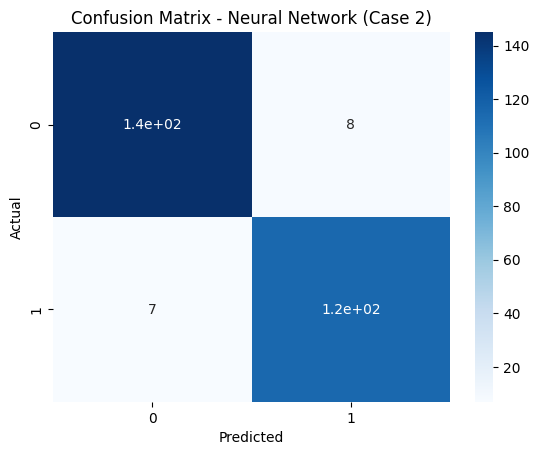

In [455]:
# Create confusion matrix
cm_nn2 = confusion_matrix(y2_test, y2_nn_pred)

# Plot heatmap
sns.heatmap(cm_nn2, annot=True, cmap='Blues')
plt.title('Confusion Matrix - Neural Network (Case 2)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### 5.4 Visualize (Neural Network on Case 2)

In [456]:
# Get the range of our two features - use padding to enhance appearance

padding = 1 
x_min, x_max = X2['skewness'].min() - padding, X2['skewness'].max() + padding
y_min, y_max = X2['variance'].min() - padding, X2['variance'].max() + padding

In [457]:
# Create a meshgrid (all combinations of curtosis and skew_var)

# A grid of values covering the entire input space
# np.linspace(start, stop, num) generates evenly spaced values (like a ruler)
# Here, we create 500 points between min and max for each axis
# np.meshgrid creates a coordinate grid from the two arrays

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                                    np.linspace(y_min, y_max, 500))

In [458]:
# Flatten the grid arrays and prepare them for prediction
# np.c_ stacks the flattened xx and yy into coordinate pairs
# .ravel() flattens a 2D array into 1D (required by the model for prediction)

Z = nn_model2.predict(np.c_[xx.ravel(), yy.ravel()])

# Reshape the predicted results to match the original 2D grid shape
Z = Z.reshape(xx.shape)

c:\Repos\applied-ml-hrawp\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


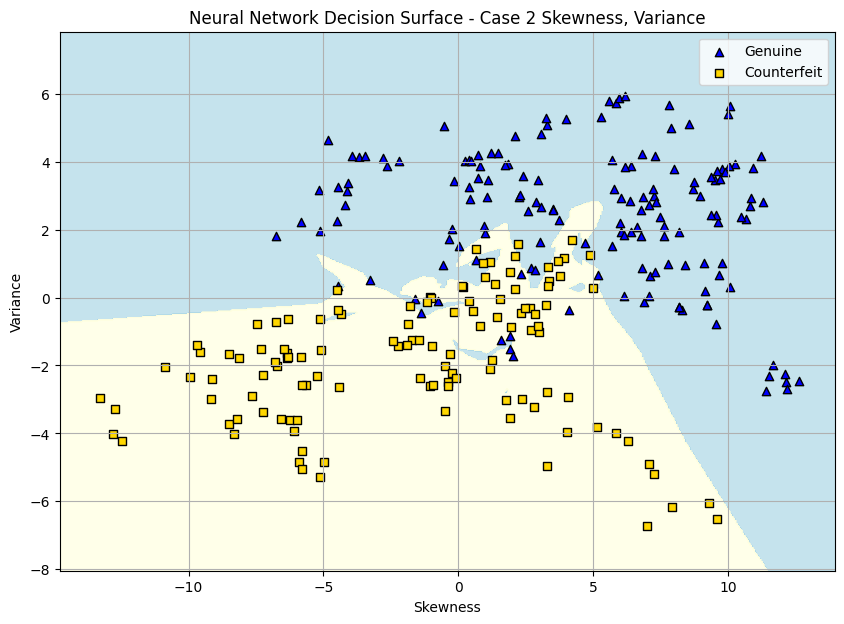

In [459]:
# Plot the decision surface (background) showing predicted survival zones

 # Blue for 0, yellow for 1 - change this up as you like
plt.figure(figsize=(10, 7))
cmap_background = ListedColormap(['lightblue', 'lightyellow'])

plt.contourf(xx, yy, Z, cmap=cmap_background, alpha=0.7)# Overlay the actual test data points for visual comparison


# Plot passengers who did NOT survive (0) as blue triangles
plt.scatter(X2_test['skewness'][y2_test == 0],
            X2_test['variance'][y2_test == 0],
            c='blue', marker='^', edgecolor='k', label='Genuine')
 
# Plot passengers who DID survive (1) as gold squares
plt.scatter(X2_test['skewness'][y2_test == 1],
            X2_test['variance'][y2_test == 1],
            c='gold', marker='s', edgecolor='k', label='Counterfeit')

# Add axis labels, title, legend, and grid
plt.xlabel('Skewness')
plt.ylabel('Variance')
plt.title('Neural Network Decision Surface - Case 2 Skewness, Variance')
plt.legend()
plt.grid(True)
plt.show()

### 5.5 Train and Evaluate Model (Neural Network on Case 3)

In [460]:
# Train NN for Case 3 (Curtosis, 'skew_var')
nn_model3 = MLPClassifier(
    hidden_layer_sizes=(50, 25, 10),
    solver='lbfgs',
    max_iter=1000,
    random_state=42
)

nn_model3.fit(X3_train, y3_train)

,hidden_layer_sizes,"(50, ...)"
,activation,'relu'
,solver,'lbfgs'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,1000
,shuffle,True
,random_state,42


In [461]:
# Predict on test data (Case 3)
y3_nn_pred = nn_model3.predict(X3_test)

# Print classification report
print("Results for Neural Network on test data (Case 3 - Curtosis, 'skew_var'):")
print(classification_report(y3_test, y3_nn_pred, digits=4))

Results for Neural Network on test data (Case 3 - Curtosis, 'skew_var'):
              precision    recall  f1-score   support

           0     0.9935    1.0000    0.9967       153
           1     1.0000    0.9918    0.9959       122

    accuracy                         0.9964       275
   macro avg     0.9968    0.9959    0.9963       275
weighted avg     0.9964    0.9964    0.9964       275



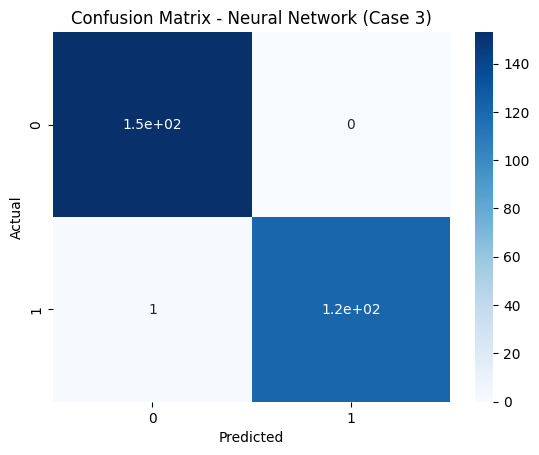

In [462]:
# Create confusion matrix
cm_nn3 = confusion_matrix(y3_test, y3_nn_pred)

# Plot heatmap
sns.heatmap(cm_nn3, annot=True, cmap='Blues')
plt.title('Confusion Matrix - Neural Network (Case 3)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### 5.6 Visualize (Neural Network on Case 3)

In [463]:
# Get the range of our two features - use padding to enhance appearance

padding = 1 
x_min, x_max = X3['curtosis'].min() - padding, X3['curtosis'].max() + padding
y_min, y_max = X3['skew_var'].min() - padding, X3['skew_var'].max() + padding

In [464]:
# Create a meshgrid (all combinations of curtosis and skew_var)

# A grid of values covering the entire input space
# np.linspace(start, stop, num) generates evenly spaced values (like a ruler)
# Here, we create 500 points between min and max for each axis
# np.meshgrid creates a coordinate grid from the two arrays

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                                    np.linspace(y_min, y_max, 500))

In [465]:
# Flatten the grid arrays and prepare them for prediction
# np.c_ stacks the flattened xx and yy into coordinate pairs
# .ravel() flattens a 2D array into 1D (required by the model for prediction)

Z = nn_model3.predict(np.c_[xx.ravel(), yy.ravel()])

# Reshape the predicted results to match the original 2D grid shape
Z = Z.reshape(xx.shape)

c:\Repos\applied-ml-hrawp\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


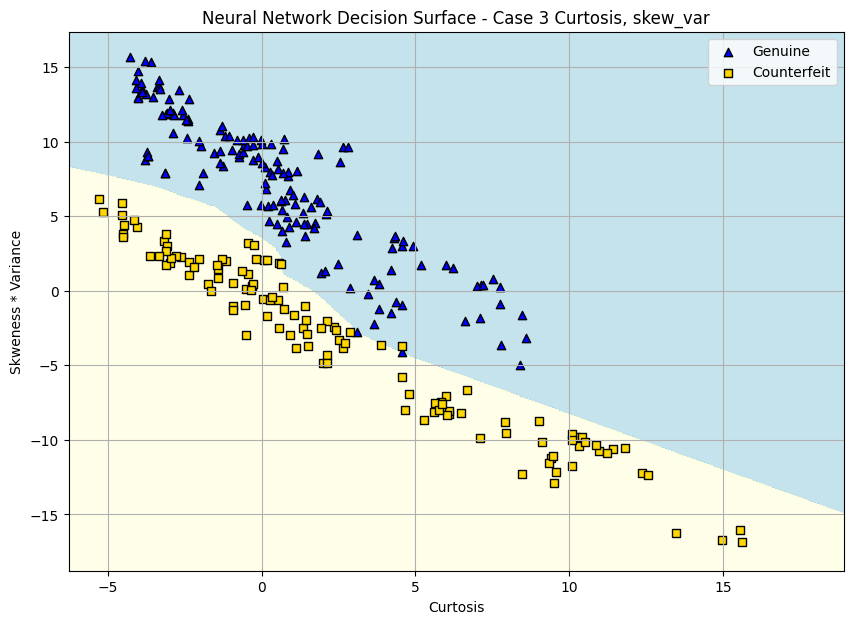

In [466]:
# Plot the decision surface (background) showing predicted survival zones

 # Blue for 0, yellow for 1 - change this up as you like
plt.figure(figsize=(10, 7))
cmap_background = ListedColormap(['lightblue', 'lightyellow'])

plt.contourf(xx, yy, Z, cmap=cmap_background, alpha=0.7)# Overlay the actual test data points for visual comparison


# Plot passengers who did NOT survive (0) as blue triangles
plt.scatter(X3_test['curtosis'][y3_test == 0],
            X3_test['skew_var'][y3_test == 0],
            c='blue', marker='^', edgecolor='k', label='Genuine')
 
# Plot passengers who DID survive (1) as gold squares
plt.scatter(X3_test['curtosis'][y3_test == 1],
            X3_test['skew_var'][y3_test == 1],
            c='gold', marker='s', edgecolor='k', label='Counterfeit')

# Add axis labels, title, legend, and grid
plt.xlabel('Curtosis')
plt.ylabel('Skweness * Variance')
plt.title('Neural Network Decision Surface - Case 3 Curtosis, skew_var')
plt.legend()
plt.grid(True)
plt.show()

### Reflection 5:
- How well did each of these neural network cases perform?  The Neural network cases with Skewness outperformed the decision tree.  But Case 1 for the NN was significantly worse at predicting that all other instances in NN or Decision Tree
- Are there any surprising results or insights?  I am surprised Skewness seemed to have such a strong effect on the metrics.  The only difference between Case 1 and Case 3 was skewness and it had a 7% difference in the results.
- Why might one model outperform the others?  Looking at the Neural Network graphs it looks like a surface with points plotted over areas that the model predicts.  That makes sense to me that the NN can make good predictions over asking questions in the decision tree.


| Model Type    | Case   | Features Used     | Accuracy | Precision | Recall | F1-Score  | Notes |
|---------------|--------|-------------------|----------|-----------|--------|-----------|-------|
| Decision Tree | Case 1 | Curtosis, Variance | 91.6%   | 91.7%     | 91.6%  | 91.6%     | -     |
|               | Case 2 | Skewness, Variance | 93.1%   | 93.2%     | 93.1%  | 93.1%     | -     |
|               | Case 3 | Curtosis, skew_var | 98.6%   | 98.6%     | 98.6%  | 98.5%     | -     |
|---------------|--------|--------------------|---------|-----------|--------|-----------|-------|
| Neural Network| Case 1 | Curtosis, Variance | 86.2%   | 86.2%     | 86.2%  | 86.2%     | -     |
|               | Case 2 | Skewness, Variance | 94.6%   | 94.6%     | 94.6%  | 94.6%     | -     |
|               | Case 3 | Curtosis, skew_var | 99.6%   | 99.6%     | 99.6%  | 99.6%     | -     |


## Section 6. Final Thoughts & Insights

- The accuracy and other metrics were higher for this dataset compared to the Titanic dataset.  It was nice to see a higher percentage for these metrics.  
- I'm not sure why the Neural Network for Case 1 shows such a low percentage compared to other NN Cases, but also compared to Case 1 in the Decision tree.  It seems there must be an error, but I have checked a few times and cannot locate why this happened.
- I got the idea to combine the Skewness and Variance from the Scatter Matrix.  I saw Genuine notes had higher values for both these parameters.  So I thought I could combine them into one variable and that worked out great.
- I have not tried three parameters in a neural network.  I liked the decisions surface for two inputs.  So I combined Skewness and Variance.
- At first I used the Case 3 engineered parameter as Skewness Times Variance.  It performed a little worse than CASE 2.  I thought I would try adding them instead, towards the end of the project, and the numbers returned tremendous.  There was only one misclassification in the CASE 3 Neural Network results.